In [1]:
from numpy.random import seed
import numpy as np
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import tensorflow as tf
# from tensorflow.python.keras.optimizers import Fire
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import optimizers

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import log_loss

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable


import matplotlib.pyplot as plt
%matplotlib inline

## Preparing the input data


In [2]:
#Preparing the input data

#loading the MNIST dataset
mnist = tf.keras.datasets.mnist

#Separating into train and test (60000 train, 10000 test)
(x_train, y_train0),(x_test, y_test0) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#flattening the images (from 28x28 to 784)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#we do not need to convert the outputs to one hot vectors.
#Also, if we convert the output to one hot vectors, the _label_binarizer.y_type_ 
#    becomes multilabel and the out_activation_ becomes logistic
#    Since keras and pytorch use softmax, we need to keep it like this
# #converting the otputs (labels) into one hot vectors
# lb = preprocessing.LabelBinarizer()
# lb.fit(np.array([0,1,2,3,4,5,6,7,8,9]))
# y_train = lb.transform(y_train0)
# y_test = lb.transform(y_test0)

## Defining the input parameters


In [3]:
#Defining the input parameters
BatchSize         = 500
NeuronsLayer1     = 100
NeuronsLayer2     = 100
Epochs            = 100

## Model in SKLearn

In [4]:
# Defining the net
# Construct our model, # Construct our loss function and an Optimizer. 

#MLP regressor uses the square loss
#MLP classifier uses the log loss function
MLP_clf =  MLPClassifier( hidden_layer_sizes         = (NeuronsLayer1,NeuronsLayer2),
                          activation                 = 'relu',#,'identity', 'tanh', 'relu'],
                          solver                     = 'adam',
                          alpha                      = 0.0         ,
                          batch_size                 = BatchSize,
                          max_iter                   = Epochs              ,
                          random_state               = 1234,
                          tol                        = -10.0 ,
                          verbose                    = True,
                        )

In [5]:
#Show aprameters of the network
MLP_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0,
 'batch_size': 500,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1234,
 'shuffle': True,
 'solver': 'adam',
 'tol': -10.0,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [6]:
#train the network

MLP_clf.fit(x_train, y_train0)


Iteration 1, loss = 0.57325389
Iteration 2, loss = 0.21299496
Iteration 3, loss = 0.15770762
Iteration 4, loss = 0.12626270
Iteration 5, loss = 0.10237293
Iteration 6, loss = 0.08634479
Iteration 7, loss = 0.07412249
Iteration 8, loss = 0.06540337
Iteration 9, loss = 0.05561397
Iteration 10, loss = 0.04935638
Iteration 11, loss = 0.04262858
Iteration 12, loss = 0.03737120
Iteration 13, loss = 0.03318029
Iteration 14, loss = 0.02973333
Iteration 15, loss = 0.02592448
Iteration 16, loss = 0.02404487
Iteration 17, loss = 0.01937777
Iteration 18, loss = 0.01869876
Iteration 19, loss = 0.01705470
Iteration 20, loss = 0.01381812
Iteration 21, loss = 0.01187036
Iteration 22, loss = 0.01088985
Iteration 23, loss = 0.01068537
Iteration 24, loss = 0.00757951
Iteration 25, loss = 0.00762695
Iteration 26, loss = 0.00575214
Iteration 27, loss = 0.00497791
Iteration 28, loss = 0.00505738
Iteration 29, loss = 0.00404529
Iteration 30, loss = 0.00376933
Iteration 31, loss = 0.00422074
Iteration 32, los

C:\Users\zb0857\AppData\Local\Continuum\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0, batch_size=500, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=-10.0,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [7]:
#Predicting

y_train_hat_clf_sk = MLP_clf.predict_proba(x_train)

log_loss(y_train0, y_train_hat_clf_sk)

6.797488053580999e-06

In [8]:
print(y_train0[0])
print(y_train0[1])

5
0


In [9]:
print(y_train_hat_clf_sk[0])
print(y_train_hat_clf_sk[1])

[2.70809940e-29 9.81606200e-27 1.15198413e-26 1.23578550e-06
 1.73868478e-48 9.99998764e-01 3.36232818e-34 1.61854154e-27
 5.19096082e-25 3.67395431e-26]
[1.00000000e+00 1.31448414e-34 6.10330686e-17 2.18557786e-26
 6.92783645e-43 2.23946052e-27 2.50928070e-23 7.97880469e-30
 1.71811914e-30 4.21395358e-19]


In [10]:
print("Number of Layers: ", len(MLP_clf.coefs_))
print("Weights layer 1: ", MLP_clf.coefs_[0].size+MLP_clf.intercepts_[0].size)
print("Weights layer 2: ", MLP_clf.coefs_[1].size+MLP_clf.intercepts_[1].size)
print("Weights layer 3: ", MLP_clf.coefs_[2].size+MLP_clf.intercepts_[2].size)


Number of Layers:  3
Weights layer 1:  78500
Weights layer 2:  10100
Weights layer 3:  1010


In [11]:
print(MLP_clf.out_activation_)
print(MLP_clf._label_binarizer.y_type_)


softmax
multiclass


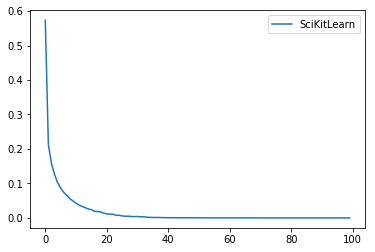

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(MLP_clf.loss_curve_, label="SciKitLearn")
ax.legend()